In [26]:
# Install required packages
!pip install datasets scikit-learn pandas numpy matplotlib seaborn

In [27]:
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
dataset = load_dataset("xwjzds/bbc-news")

README.md:   0%|          | 0.00/483 [00:00<?, ?B/s]

data/train-00000-of-00001-7a59686b1f65c1(…):   0%|          | 0.00/1.71M [00:00<?, ?B/s]

data/test-00000-of-00001-fc0872f372be003(…):   0%|          | 0.00/1.34M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1225 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [29]:
# Convert to pandas
df = dataset["train"].to_pandas()
print("Dataset sample:")
print(df.head())

Dataset sample:
                                                text  label     label_text
0  wales want rugby league training wales could f...      2          sport
1  china aviation seeks rescue deal scandal-hit j...      1       business
2  rock band u2 break ticket record u2 have smash...      3  entertainment
3  markets signal brazilian recovery the brazilia...      1       business
4  tough rules for ringtone sellers firms that fl...      0           tech


In [30]:
# Inspect unique labels
print("Unique labels:", df["label"].unique())

# From inspection: 0=tech, 1=business, 2=sport, 3=entertainment, 4=politics
df["target"] = df["label"].apply(lambda x: 1 if x == 2 else 0)

Unique labels: [2 1 3 0 4]


In [31]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["target"], test_size=0.2, random_state=42
)

In [32]:
#Vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [35]:
#Train Logistic Regression Classifier
model = LogisticRegression(class_weight="balanced", max_iter=300)
model.fit(X_train_vec, y_train)

LogisticRegression(class_weight='balanced', max_iter=300)

In [36]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9918367346938776

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.98      0.98      0.98        54

    accuracy                           0.99       245
   macro avg       0.99      0.99      0.99       245
weighted avg       0.99      0.99      0.99       245



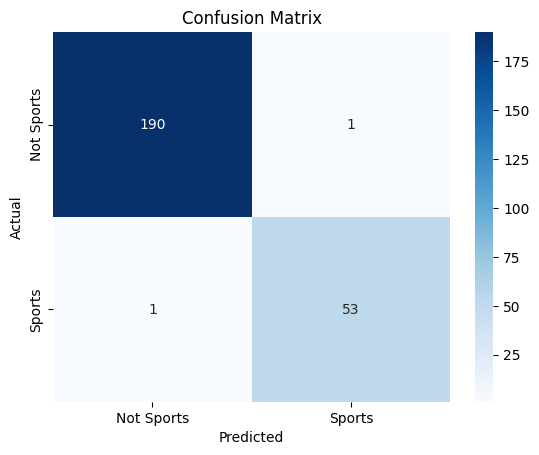

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Sports","Sports"], yticklabels=["Not Sports","Sports"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
sample = ["Manchester United defeated Liverpool 3–1 in a thrilling match"]
sample_vec = vectorizer.transform(sample)
prediction = model.predict(sample_vec)
print("Prediction:", "Sports" if prediction[0] == 1 else "Not Sports")

Prediction: Sports
